In [30]:
# Loading libraries
import datetime as dt
from datetime import timedelta
from statistics import mean
import random
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
# Downloading assets of Russel 2000 ETF from here: https://www.ishares.com/us/products/239710/ishares-russell-2000-etf
# Loading excel file - https://www.ishares.com/us/products/239710/ishares-russell-2000-etf/1467271812596.ajax?fileType=csv&fileName=IWM_holdings&dataType=fund using csv
url = "https://www.ssga.com/us/en/individual/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx"
excel_data_df =(pd.read_excel('holdings-daily-us-en-spy.xlsx')) # Extracts the asset tickers from the excel file
my_tickers = excel_data_df['Ticker'].dropna().tolist() # Converts them to a list which we can use for yfinance

In [19]:
## Now downloading the data using the above variables
start_date = dt.datetime.today() - dt.timedelta(days=252*10) # 10 years data
end_date = dt.datetime.today()
my_port = yf.download(start=start_date, end=end_date, tickers=my_tickers)
my_port  # Visualizing stock data

[*********************100%***********************]  504 of 504 completed

3 Failed downloads:
- -: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


Adj Close                                                 \
                   -           A        AAL        AAPL        ABBV   
Date                                                                  
2017-06-26       NaN   56.175549  47.344311   34.124641   53.538647   
2017-06-27       NaN   55.834164  47.072548   33.635540   53.281044   
2017-06-28       NaN   56.327259  47.800472   34.126987   53.671127   
2017-06-29       NaN   55.882477  48.159584   33.623833   53.347271   
2017-06-30       NaN   56.367168  48.838982   33.703400   53.369358   
...              ...         ...        ...         ...         ...   
2024-05-13       NaN  147.759995  14.930000  186.279999  161.279999   
2024-05-14       NaN  151.279999  15.190000  187.429993  161.589996   
2024-05-15       NaN  154.080002  14.940000  189.720001  163.789993   
2024-05-16       NaN  154.309998  14.790000  189.839996  164.350006   
2024-05-17       NaN  154.229996  14.730000  189.869995  166.419998   

                                                                        ...  \
                  ABNB         ABT        ACGL         ACN        ADBE  ...   
Date                                                                    ...   
2017-06-26         NaN   43.283703   30.966667  110.135620  144.960007  ...   
2017-06-27         NaN   43.071320   30.993334  110.000580  142.539993  ...   
2017-06-28         NaN   42.903179   31.446667  111.395943  143.809998  ...   
2017-06-29         NaN   43.124416   31.389999  110.720772  141.240005  ...   
2017-06-30         NaN   43.018223   31.096666  111.341911  141.440002  ...   
...                ...         ...         ...         ...         ...  ...   
2024-05-13  149.130005  104.769997   97.910004  307.410004  483.109985  ...   
2024-05-14  146.699997  104.010002   97.900002  306.950012  475.950012  ...   
2024-05-15  145.800003  104.589996   97.870003  308.519989  485.350006  ...   
2024-05-16  147.190002  104.870003   98.820000  308.000000  482.880005  ...   
2024-05-17  145.660004  104.089996  100.989998  303.589996  483.429993  ...   

            Volume                                                         \
               WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                        
2017-06-26  829800  3298400  1174500  1889900   7718700  2000800  1001900   
2017-06-27  767200  3806500  1729800  3473800   9221600  1234800  1399000   
2017-06-28  864100  1652300  1268400  2880100   9189700  1321100  1181300   
2017-06-29  895600  3038600  1779600  4966700  20525100  2108700  1270900   
2017-06-30  653900  3210500  1455000  3300300  14000600  1814300  1727000   
...            ...      ...      ...      ...       ...      ...      ...   
2024-05-13  301100  2868600  1750000  4508300  15060600  1276900  1742300   
2024-05-14  570100  3007500   973400  2693900  15079100   949800  2180300   
2024-05-15  355700  4726200  1131500  2278400  18244300  1390200  1810300   
2024-05-16  313700  4181800  1171200  2483500  15745200  1603200  2419700   
2024-05-17  293000  4469400  1071800  4092800  15103100  2266400  1346400   

                                      
                ZBH    ZBRA      ZTS  
Date                                  
2017-06-26  1047407  223200  1911700  
2017-06-27   954604  226600  2329900  
2017-06-28  1155248  351000  1635200  
2017-06-29  1350330  645700  1782100  
2017-06-30   764672  457100  1890200  
...             ...     ...      ...  
2024-05-13  1180900  232900  2125800  
2024-05-14  1348700  216300  2050100  
2024-05-15  1153900  217500  2585700  
2024-05-16   970800  288400  1694900  
2024-05-17  1181200  222700  1999500  

[1736 rows x 3024 columns]

In [20]:
new_port_adj = my_port["Adj Close"].dropna(how="all",axis=1)
new_port_vol = my_port["Volume"].dropna(how="all",axis=1)
new_port_low = my_port["Low"].dropna(how="all",axis=1)

**Creating Important Functions**

In [21]:
slopes = pd.DataFrame(index=new_port_adj.columns)
def trend(data,days): # Credit to professor. This calculates the slopes of trend lines.
        for ind in range (1,21):
            slopes[ind] = np.polyfit(range(days),data[-days-ind:-ind], 1)[0] # Using days variable to adjust for how far in date I am looking for.
        return slopes.mean(axis=1)

def normalization(data): # Normalizes each momentum factor
    sum_column = data.sum(axis=0)
    data = data/sum_column
    return data

def market_return(data): # Caculates the market returns. Relevent to Chart 1
    returns = data.resample('M').mean().pct_change()[-1:].tolist() # Resamples data by month and takes the last datapoint of the mean percent change.
    return returns 

def basket_returns(data,short_basket,long_basket): # Calculates the basket returns. Relevent to Chart 1
    short_basket_return = data[short_basket].resample('M').mean().pct_change().mean(axis=1)[-1:].tolist() # Same as above
    long_basket_return = data[long_basket].resample('M').mean().pct_change().mean(axis=1)[-1:].tolist()
    return short_basket_return,long_basket_return

def basket_returns_cumulative(data,short_basket,long_basket,index): # Same idea as calculating market and basket returns. You will notice an additional input: index, which goes to pct_change to create cumulative returns.
    short_basket_return = data[short_basket].resample('M').mean().pct_change(index).mean(axis=1)[-1:].tolist()
    long_basket_return = data[long_basket].resample('M').mean().pct_change(index).mean(axis=1)[-1:].tolist()
    return short_basket_return,long_basket_return

def market_return_cumulative(data,index): # Same as above, but for the market.
    returns = data.resample('M').mean().pct_change(index)[-1:].tolist()
    return returns 

**Creating a class to determine short and long basket**

In [22]:
class trad_algo:
    def __init__(self, adj_close,volume,low):
        self.values1 = adj_close
        self.values2 = volume
        self.values3 = low
        
    def weekreturn39(self): # 39 week return with 20 day lag
        returns = self.values1.pct_change(39*5)[-20:].mean() # Percent change over 39 weeks is calculated and the mean of 20 datapoints for 20 day lag is calculated.
        return normalization(returns)
    
    def weektrend52(self): # Slope of 52 week trend line
        number_of_days = 252 # 52 weeks of trading days
        slope = trend(self.values1,number_of_days)
        return normalization(slope) # Passing this information to trend function
    
    def weektrend51volume(self): # 51 week volume trend
        number_of_days = 247 # 51 weeks of trading days
        slope = trend(self.values2,number_of_days)  # Passing this information to trend function
        return normalization(slope)
    
    def weeklow260(self): # 260 week low
        returns = self.values3.pct_change(260)[-20:].mean()
        return normalization(returns)
    
    def weekpriceoscillator_4_52(self): # # 4/52 week price oscillator
        # Using Exponential Moving Average (EWM) for 4 and 52 week data.
        four_week_ema = self.values1.ewm(span=4, min_periods=4).mean()[-20:].mean() # There are two means in this line. One is the procedure to calculate EMW, the other is to account for 20 day lag.
        fiftytwo_week_ema = self.values1.ewm(span=52, min_periods=52).mean()[-20:].mean()
        
        # Price Oscillator Calculation : Used from this website - https://trendspider.com/learning-center/the-percentage-price-oscillator-ppo-an-overview/
        
        price_oscillator = (four_week_ema - fiftytwo_week_ema)/(fiftytwo_week_ema)
        return normalization(price_oscillator)
    
    def zscore(self): # Calculating z-score by averaging over the normalized momentum factors
        average_zscore = (self.weekreturn39()+self.weektrend52()+self.weektrend51volume()+self.weeklow260()+self.weekpriceoscillator_4_52())/5
        average_zscore = average_zscore.to_frame()
        return average_zscore.sort_values(by=[0],ascending=False).dropna() # Sorting z scores from biggest to smallest and dropping NaN values
    
    def basket(self): # Outputs lists of short/long baskets
        short = self.zscore()[-10:] # Picks out the bottom 10 assets
        long = self.zscore()[0:10:] # Picks out the top 10 assets
        return short.index.tolist(),long.index.tolist() # Returns a list of short and long basket

**Backtesting 5 years**

In [24]:
# Downloading benchmark data first
market_ticker = ["SPY"]
start_date = dt.datetime.today() - dt.timedelta(days=252*10) # 10 years data
end_date = dt.datetime.today()
market_port = yf.download(start=start_date, end=end_date, tickers=market_ticker)
market_port  # Visualizing stock data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-26,243.899994,244.380005,243.050003,243.289993,217.153763,56700500
2017-06-27,243.039993,243.380005,241.309998,241.330002,215.404373,82247700
2017-06-28,242.500000,243.720001,242.229996,243.490005,217.332306,70042600
2017-06-29,243.660004,243.720001,239.960007,241.350006,215.422226,106949700
2017-06-30,242.279999,242.710007,241.580002,241.800003,215.823853,86820700
...,...,...,...,...,...,...
2024-05-13,522.559998,522.669983,519.739990,520.909973,520.909973,36716400
2024-05-14,521.109985,523.830017,520.559998,523.299988,523.299988,57535900
2024-05-15,525.830017,530.080017,525.179993,529.780029,529.780029,59504900


In [25]:
market_port_adjclose = market_port["Adj Close"].dropna()
market_port_adjclose

Date
2017-06-26    217.153763
2017-06-27    215.404373
2017-06-28    217.332306
2017-06-29    215.422226
2017-06-30    215.823853
                 ...    
2024-05-13    520.909973
2024-05-14    523.299988
2024-05-15    529.780029
2024-05-16    528.690002
2024-05-17    529.450012
Name: Adj Close, Length: 1736, dtype: float64

In [26]:
# Credit to Professor for most of this code. I have made modifications to the initial code he provided.
dr_end = dt.datetime.today()
dr_start = dr_end-dt.timedelta(365.25*5)
freq = 'M'
date_list = pd.date_range(start = dr_start,end = dr_end,freq=freq,normalize = True)
date_list_market = date_list
date_list = date_list.delete(-1)
date_list_market = date_list_market.delete(0)
# I have deleted the 0 and -1 index dates from the market date list and basket date list because they should be offset by 1 month. That is to say, baskets determined at the end of one month should be compared to the returns of the ETF at the end of the next month. Offsetting in this way allows for that.

# Initializing lists

# Relevant to charts 1 & 2
short_basket_returns_list = []
long_basket_returns_list = []
market_returns_list = []

# Relevant to chart 3
short_basket_returns_cm_list=[]
long_basket_returns_cm_list=[]
market_returns_cm_list=[]
i=0 # This index helps in offsetting the dates for the market and basket returns, but also acts as the index for the cumulative return calculations.
for date in date_list:
        MF = trad_algo(new_port_adj[new_port_adj.index<=date],new_port_vol[new_port_vol.index<=date],new_port_low[new_port_low.index<=date])
        short_basket,long_basket = MF.basket()[0],MF.basket()[1]
        # Relevant to charts 1 & 2
        short_basket_returns = basket_returns(new_port_adj[new_port_adj.index<=date],short_basket,long_basket)[0]
        long_basket_returns = basket_returns(new_port_adj[new_port_adj.index<=date],short_basket,long_basket)[1]
        market_returns = market_return(market_port_adjclose[market_port_adjclose.index<=date_list_market[i]]) # Notice the use of i here to access the market dates.
        # Relevant to chart 3
        short_basket_cm_returns = basket_returns_cumulative(new_port_adj[new_port_adj.index<=date],short_basket,long_basket,i+1)[0]
        long_basket_cm_returns = basket_returns_cumulative(new_port_adj[new_port_adj.index<=date],short_basket,long_basket,i+1)[1]
        market_cm_returns = market_return_cumulative(market_port_adjclose[market_port_adjclose.index<=date_list_market[i]],i+1)
        # Appending them to lists for visualization
        short_basket_returns_list.append(short_basket_returns)
        long_basket_returns_list.append(long_basket_returns) 
        market_returns_list.append(market_returns)
        short_basket_returns_cm_list.append(short_basket_cm_returns)
        long_basket_returns_cm_list.append(long_basket_cm_returns)
        market_returns_cm_list.append(market_cm_returns)
        i = i+1 # Helps move to the next index
        
# Using list comprehension to combine list. Previously, it would output list of lists, so I need to combine them.
short_basket_returns_list = [item for sublist in short_basket_returns_list for item in sublist]
long_basket_returns_list = [item for sublist in long_basket_returns_list for item in sublist]
market_returns_list = [item for sublist in market_returns_list for item in sublist]
short_basket_returns_cm_list = [item for sublist in short_basket_returns_cm_list for item in sublist]
long_basket_returns_cm_list = [item for sublist in long_basket_returns_cm_list for item in sublist]
market_returns_cm_list = [item for sublist in market_returns_cm_list for item in sublist]
# Using list comprehenstion to calculate monthly returns vs SPY
# Chart 1 calculation
sum1 = [x + y for x, y in zip(short_basket_returns_list, long_basket_returns_list)]  # Adding two lists
total_returns = [x - y for x, y in zip(sum1,market_returns_list)] # Difference of two lists
# Chart 3 calculation
cumulative_return= [x + y for x, y in zip(short_basket_returns_cm_list, long_basket_returns_cm_list)] # Adding two lists

**Chart 1: Monthly portfolio return bar chart vs SPY** 

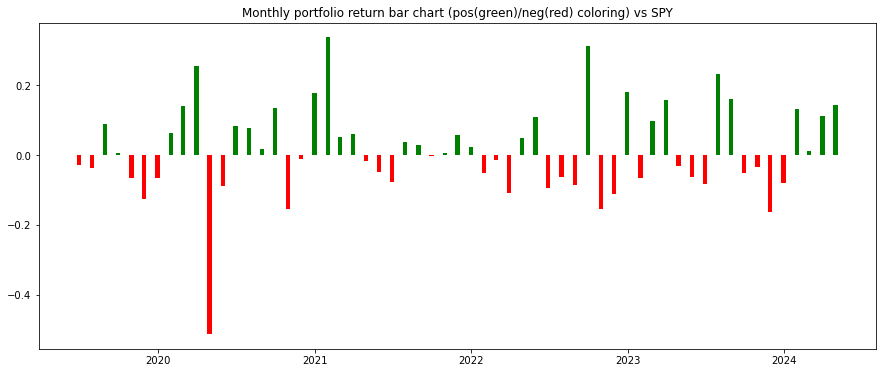

In [27]:

plt.figure(figsize=(15,6))
colors = ["red" if i < 0 else "green" for i in total_returns] # Condition for coloring
plt.bar(date_list_market,total_returns,width=10,color = colors)
plt.title('Monthly portfolio return bar chart (pos(green)/neg(red) coloring) vs SPY')
plt.show()

**Chart 2: Monthly return for short picks vs long picks vs ETF** 

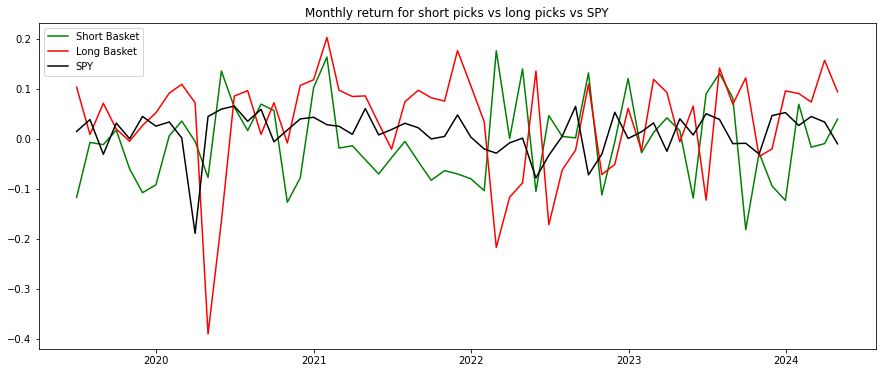

In [28]:
plt.figure(figsize=(15,6))
plt.plot(date_list_market, short_basket_returns_list,color='green')
plt.plot(date_list_market, long_basket_returns_list,color='red')
plt.plot(date_list_market, market_returns_list,color='black')
plt.title('Monthly return for short picks vs long picks vs SPY')
plt.legend(['Short Basket','Long Basket','SPY'])
plt.show()


**Chart 3: Cumulative portfolio return vs ETF** 


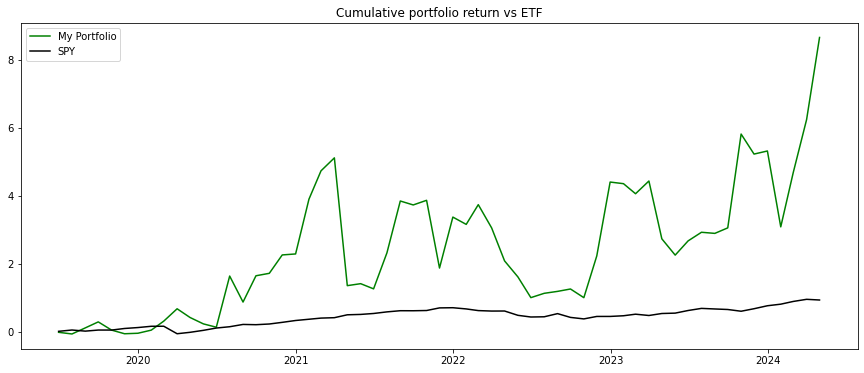

In [29]:
plt.figure(figsize=(15,6))
plt.plot(date_list_market, cumulative_return,color='green')
plt.plot(date_list_market, market_returns_cm_list,color='black')
plt.title('Cumulative portfolio return vs ETF')
plt.legend(['My Portfolio','SPY'])
plt.show()

The return on my portfolio is very high! Either I am going to be rich very quickly, or I have performed some calculations incorrectly. Probably the latter :)
